In [ ]:
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
Consumer_Key = "3HO6kPG8IkepplriklZTy9E66"
Consumer_Secret_Key = "8NbLGtNGOpsuB7RIktwIQuYt5NbBibeL4JXaOEEbHeJRWzqqNa"
Access_Token = "1435589046453956612-gAXLJOozWrSLhtrJ6gDdE6vPBBn3Qh"
Access_Token_Secret = "CmWnvaMKKzQ6Gik7rX7yZ7UsEHLPa50vJrW1Yt9V0BiEc"

In [ ]:
auth = tweepy.OAuthHandler(Consumer_Key,Consumer_Secret_Key)
auth.set_access_token(Access_Token,Access_Token_Secret)
api = tweepy.API(auth)

In [ ]:
posts = api.user_timeline(screen_name="UniPinIndonesia", count = 1000, lang ="en", tweet_mode="extended")

# Print the last 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:10]:
  print(str(i) +')'+ tweet.full_text+ '\n')
  i=i+1

Show the 5 recent tweets:

1)caption twitter: Dapetin promo diskon sebesar Rp20.000 Penasaran gimana cara dapatin diskon din aplikasi OY!? Klik link ini ya: https://t.co/mfgd0EHQzs https://t.co/BzEjg43Y3R

2)Top up Diamonds Lords Mobile di UniPin dan bayar lewat Indomaret Payment Point sekarang juga supaya kalian berkesempatan memenangkan Floridina 350ml secara gratis.

Yuk simak syarat dan ketentuannya di https://t.co/HHmOeu0i1w https://t.co/2p4Mk0xHKw

3)Dapatkan cashback 25.000 OVO Points dan exclusive merchandise hanya dengan top up Genshin Impact di UniPin dan bayar pakai OVO.
Langsung aja cek website UniPin untuk syarat dan ketentuannya atau klik link di bawah ini!
https://t.co/NVmf6aHseg https://t.co/d0wN2n7xvj

4)Top up game favorit kamu pakai Virgo dan dapatkan cashback 100% max Rp25,000 + bonus saldo Virgo Rp100,000 ! Wow banget kan? Buruan deh top up pakai Virgo di UniPin.
https://t.co/wBIZUeZ3IJ

#UniPin #DitemeninUniPin #Virgo https://t.co/iayHFqcv2Q

5)RT @Indomaret: Soba

In [ ]:
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show 10 rows of data
df.head()

,Tweets
0,caption twitter: Dapetin promo diskon sebesar ...
1,Top up Diamonds Lords Mobile di UniPin dan bay...
2,Dapatkan cashback 25.000 OVO Points dan exclus...
3,Top up game favorit kamu pakai Virgo dan dapat...
4,RT @Indomaret: Sobat Indomaret. Jangan lupa sa...


In [ ]:
def cleanTxt(text):
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #removing Text and Number
  text = re.sub(r'#','', text) #removing Hastag
  text = re.sub(r'RT[\s]+','', text) #removing RT
  text = re.sub(r'https?:\/\/\S+', '', text) #removing hyperlink

  return text

df['Tweets']=df['Tweets'].apply(cleanTxt)
df

,Tweets
0,caption twitter: Dapetin promo diskon sebesar ...
1,Top up Diamonds Lords Mobile di UniPin dan bay...
2,Dapatkan cashback 25.000 OVO Points dan exclus...
3,Top up game favorit kamu pakai Virgo dan dapat...
4,: Sobat Indomaret. Jangan lupa saksikan UIC 20...
...,...
192,"Group A Kerad, Group B kayak Neraka\nLadies Se..."
193,MinPin tampung dulu ya requestnya. MinPin bak...
194,"Oh iya, MinPin mau infoin nih ke temen-temen k..."
195,: UNIPIN MAKASI WEBINARNYA BANYAK BANGET🥺🥺🥺🥺🥺🥺🥺🥺🥺


In [ ]:
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns 'Subjectiviy' & 'Polarity'
df['Subjectiviy'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

df

,Tweets,Subjectiviy,Polarity
0,caption twitter: Dapetin promo diskon sebesar ...,0.0,0.000
1,Top up Diamonds Lords Mobile di UniPin dan bay...,0.5,0.500
2,Dapatkan cashback 25.000 OVO Points dan exclus...,0.5,0.625
3,Top up game favorit kamu pakai Virgo dan dapat...,0.6,0.150
4,: Sobat Indomaret. Jangan lupa saksikan UIC 20...,0.8,0.500
...,...,...,...
192,"Group A Kerad, Group B kayak Neraka\nLadies Se...",0.0,0.000
193,MinPin tampung dulu ya requestnya. MinPin bak...,0.0,0.000
194,"Oh iya, MinPin mau infoin nih ke temen-temen k...",0.0,0.000
195,: UNIPIN MAKASI WEBINARNYA BANYAK BANGET🥺🥺🥺🥺🥺🥺🥺🥺🥺,0.0,0.000


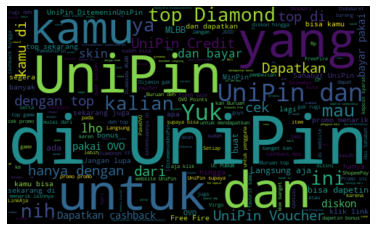

In [ ]:
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=10, max_font_size=110).generate(allWords)

plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
#create a function to compute negative (-1) neutral (0) and positive (+1) analysis

def getAnalysis(score):
  if score < 0:
    return 'negative'
  elif score == 0:
    return 'neutral'
  else:
    return 'positive'
df['Analysis'] = df['Polarity'].apply(getAnalysis)
df

,Tweets,Subjectiviy,Polarity,Analysis
0,caption twitter: Dapetin promo diskon sebesar ...,0.0,0.000,neutral
1,Top up Diamonds Lords Mobile di UniPin dan bay...,0.5,0.500,positive
2,Dapatkan cashback 25.000 OVO Points dan exclus...,0.5,0.625,positive
3,Top up game favorit kamu pakai Virgo dan dapat...,0.6,0.150,positive
4,: Sobat Indomaret. Jangan lupa saksikan UIC 20...,0.8,0.500,positive
...,...,...,...,...
192,"Group A Kerad, Group B kayak Neraka\nLadies Se...",0.0,0.000,neutral
193,MinPin tampung dulu ya requestnya. MinPin bak...,0.0,0.000,neutral
194,"Oh iya, MinPin mau infoin nih ke temen-temen k...",0.0,0.000,neutral
195,: UNIPIN MAKASI WEBINARNYA BANYAK BANGET🥺🥺🥺🥺🥺🥺🥺🥺🥺,0.0,0.000,neutral


In [ ]:
print('Negative tweets:\n')

j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'negative'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j=j+1

Negative tweets:

1) Hi Sahabat UniPin!

Jangan lewatkan kemeriahan MLBB 11.11 bersama UniPin dan Tri! Ada bonus kuota internet hingga 5GB supaya push rank kamu makin lancar. Langsung aja cek promonya di  

2) Kalian masih ingat sama game yang satu ini? Apakah kalian merindukannya? :')

Source : 

UniPin PakeUniPin Dota Dota1 VideoGame Steam warcraftIII Warcraft DitemeninUniPin 

3)  Dek, lain kali kalo main game di gadget aja yaaa
Hari ini kejepit tembok, gedenya kejepit hutang lho dek, serem

4) Gak perlu gaji 25jt buat bisa nikmatin game kesayangan kalian, soalnya MinPin udah siapin flash sale potongan 25k pake OVO buat kalian malam ini

Pantengin ya my luv 😘
flashsale UniPin

5) Push rank dan mabar makin asyik ditemenin reward dari UniPin!
Cukup top up Diamonds kamu di minimal Rp 20,000 untuk dapetin cashback hingga 50% UniPin Credits dan reward skin Yu Zhong – Blood Serpent + 210 Diamonds MLBB hanya di UniPin!

 

6) “Min, game yg aku mau ngga ada nih”

Cekot UniPin Voucher aja, b

In [ ]:
print('Positive tweets:\n')

j=1
sortedDF = df.sort_values(by=['Polarity'], ascending=False)
for i in range(0, sortedDF.shape[0]):
  if (sortedDF['Analysis'][i] == 'positive'):
    print(str(j) + ') ' +sortedDF['Tweets'][i])
    print()
    j=j+1

Positive tweets:

1) Top up Diamonds Lords Mobile di UniPin dan bayar lewat Indomaret Payment Point sekarang juga supaya kalian berkesempatan memenangkan Floridina 350ml secara gratis.

Yuk simak syarat dan ketentuannya di  

2) Dapatkan cashback 25.000 OVO Points dan exclusive merchandise hanya dengan top up Genshin Impact di UniPin dan bayar pakai OVO.
Langsung aja cek website UniPin untuk syarat dan ketentuannya atau klik link di bawah ini!
 

3) Top up game favorit kamu pakai Virgo dan dapatkan cashback 100% max Rp25,000 + bonus saldo Virgo Rp100,000 ! Wow banget kan? Buruan deh top up pakai Virgo di UniPin.


UniPin DitemeninUniPin Virgo 

4) : Sobat Indomaret. Jangan lupa saksikan UIC 2021 - Free Fire Ladies Championship Week 3: 16-17 Desember 2021! 
Dukung terus ti…

5) Royale Pass M6 akan segera hadir! pastinya ga sabar dong untuk melengkapi koleksi Royale Pass kamu!

Top up UC PUBGM aman dan terpercaya? ya di UniPin aja!



UniPin DitemeninUniPin PakeUniPin PUBGM Royalepass M6

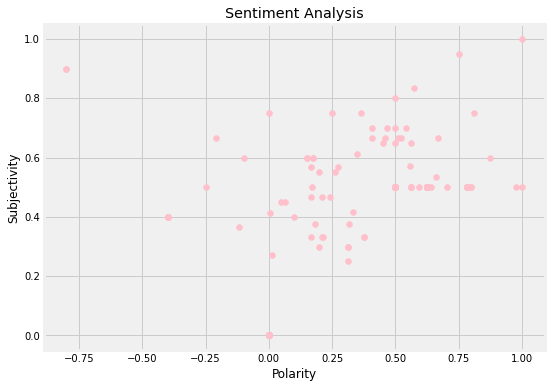

In [ ]:
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectiviy'][i], color='pink')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
#persentasepositiv

ptweets = df[df.Analysis == 'positive']
ptweets = ptweets['Tweets']

round ( (ptweets.shape[0] / df.shape[0]) *100, 1)

50.3

In [ ]:
#persentasenegatif

ntweets = df[df.Analysis == 'negative']
ntweets = ntweets['Tweets']

round ( (ntweets.shape[0] / df.shape[0]) *100, 1)

5.6

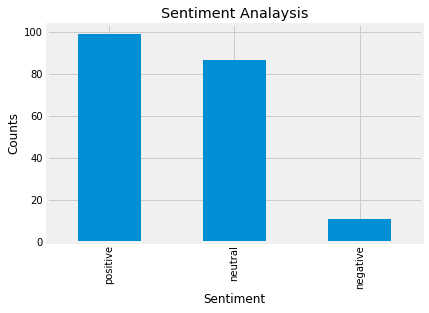

In [ ]:
#show value count

df['Analysis'].value_counts()

plt.title('Sentiment Analaysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()